In [2]:
import numpy as np
from scipy import special as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import h5py as h5

In [3]:
def read_files(dir = 'C:\\Users\\ricca\\Desktop\\QTLab2324\\IRdetection\\Instruments\\Test_data\\data_20_02_set2\\'):

    dfs, dictionaries, temps = [], [], []

    for folder in os.listdir(dir):
        if ('T' in folder):
            temps.append(int(str(folder).replace('T_','')))
            parent = dir+folder+'\\'
            dictionaries = []
            for (i,filename) in enumerate(os.listdir(parent)):
                my_dest = filename.replace('.h5','.hdf5')
                my_source = parent + filename
                my_dest = parent + my_dest
                os.rename(my_source, my_dest)
                with h5.File(my_dest, 'r') as r:
                    group = r.require_group(name='raw_data')
                    dic = dict()
                    for c in group.items():
                        dic[c[0]] = c[1][:]
                dictionaries.append(dic)
        dfs.append(dictionaries)
    return dfs, temps

In [4]:
df = np.genfromtxt('C:\\Users\\ricca\\Desktop\\QTLab2324\\IRdetection\\Notebooks\\Phase\\data_20_02_set2_phase.txt', skip_header=True)

In [5]:
dfs, temps = read_files(dir='C:\\Users\\ricca\\Desktop\\QTLab2324\\IRdetection\\Instruments\\Test_data\\data_20_02_set2\\')

for i in range(len(dfs)):
    for j in range(4):
        dfs[i][j]['S21'] = np.sqrt(np.array(dfs[i][j]['i'])**2+ np.array(dfs[i][j]['q'])**2)
        dfs[i][j]['Phase'] = df[i*4+j][3]

Let's look at the Smith Chart of acquired data

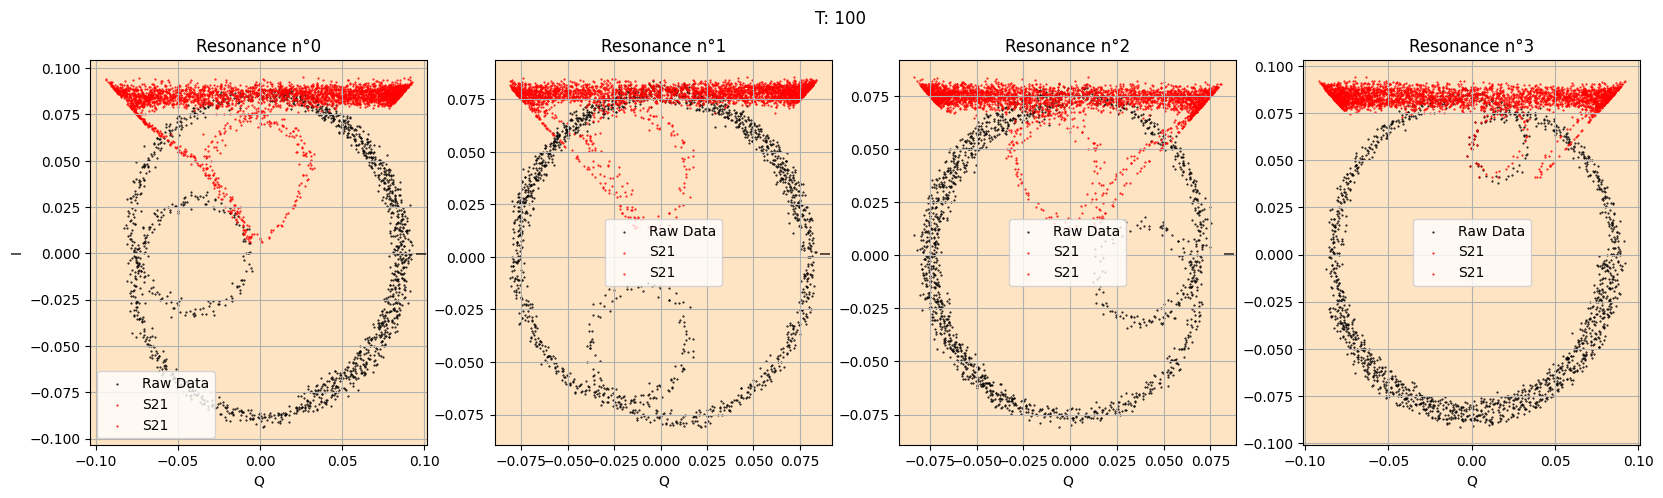

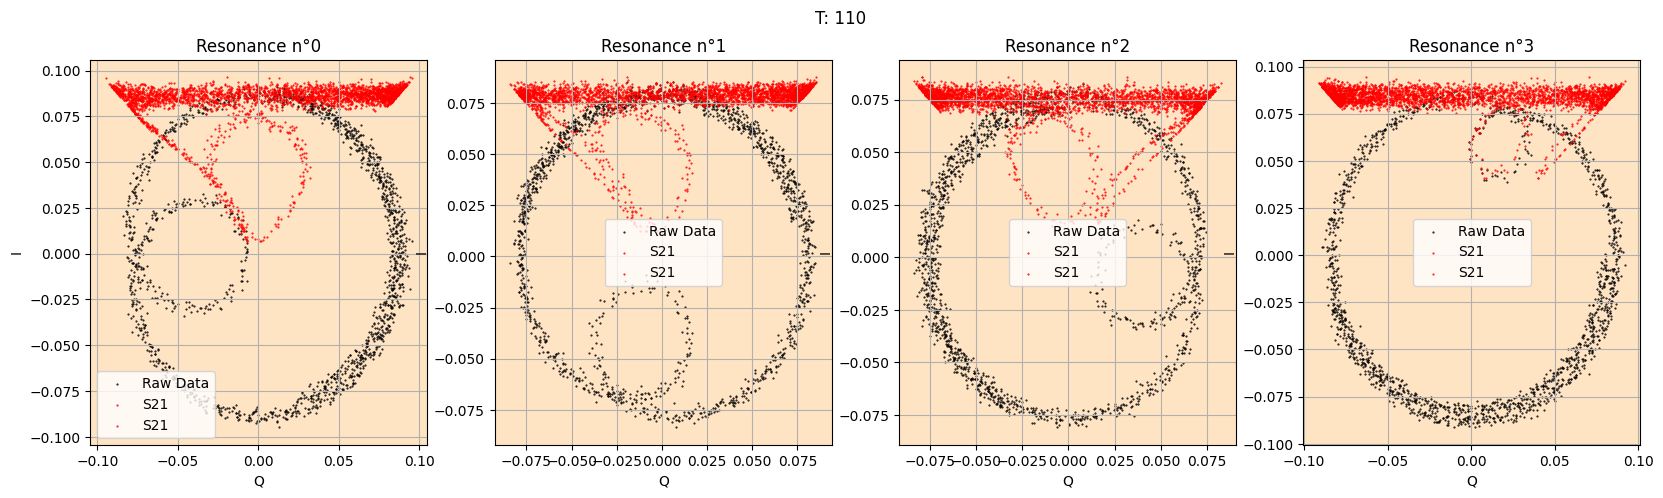

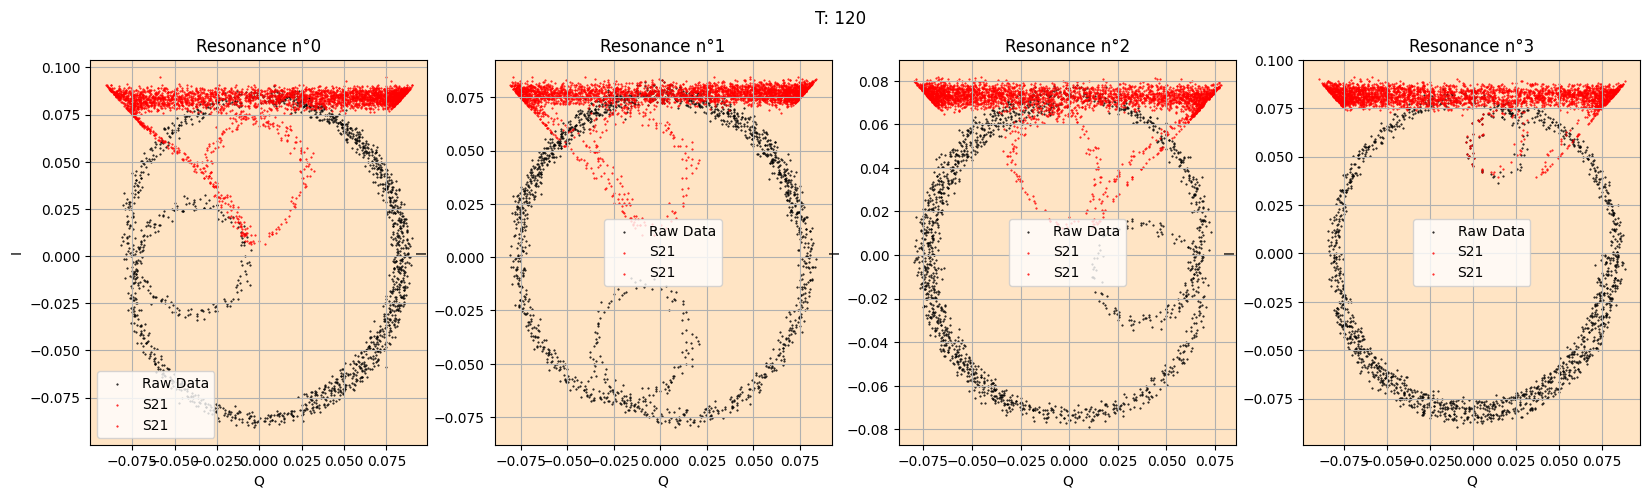

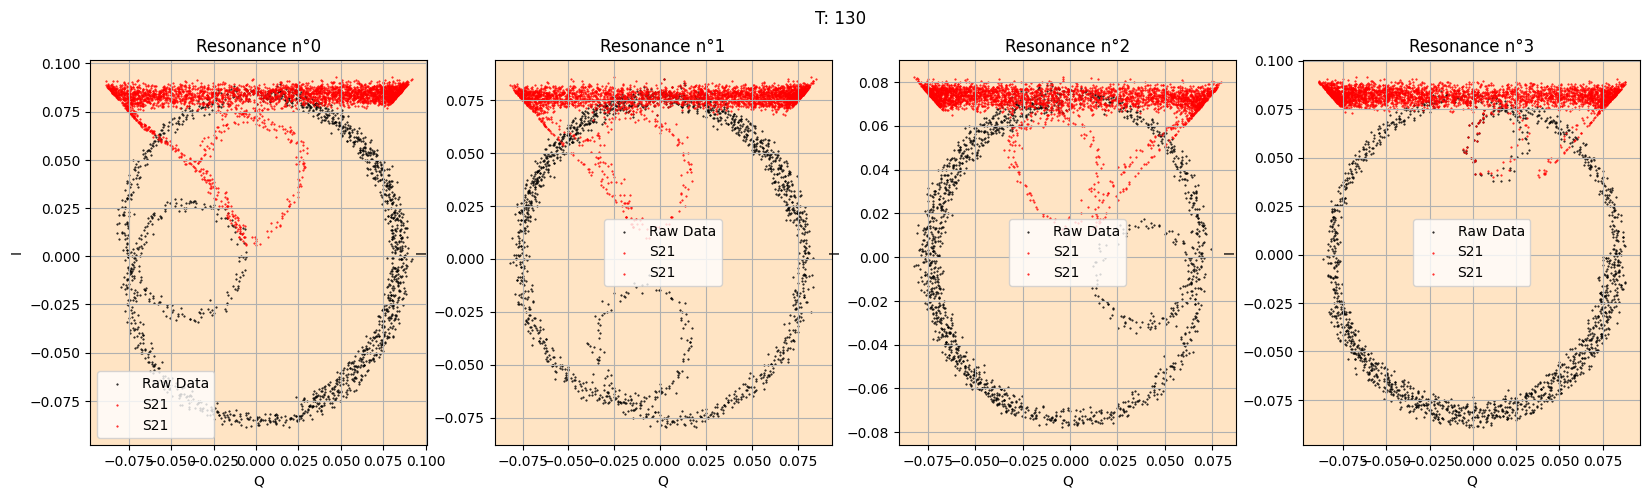

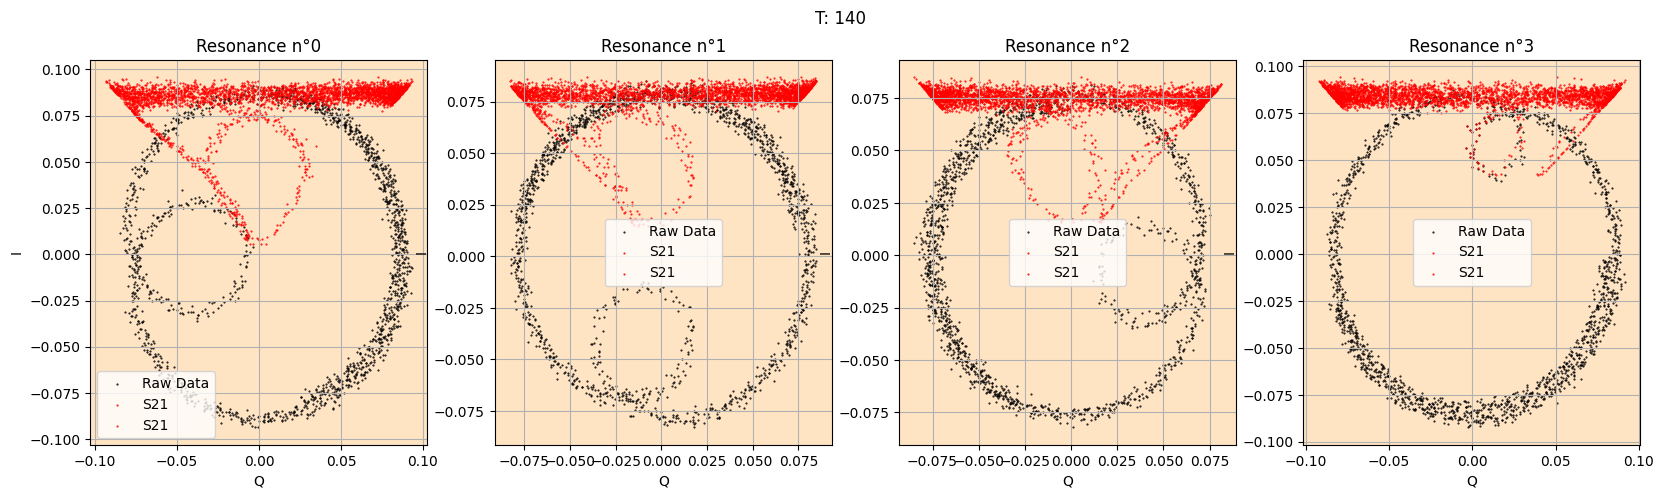

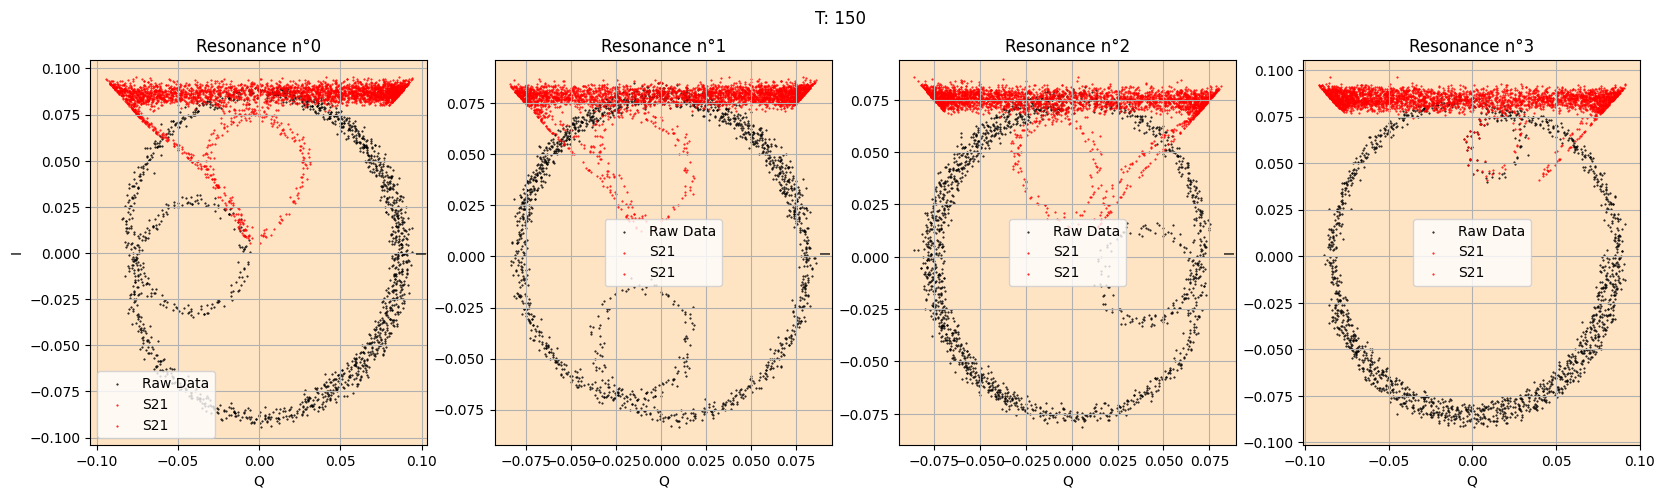

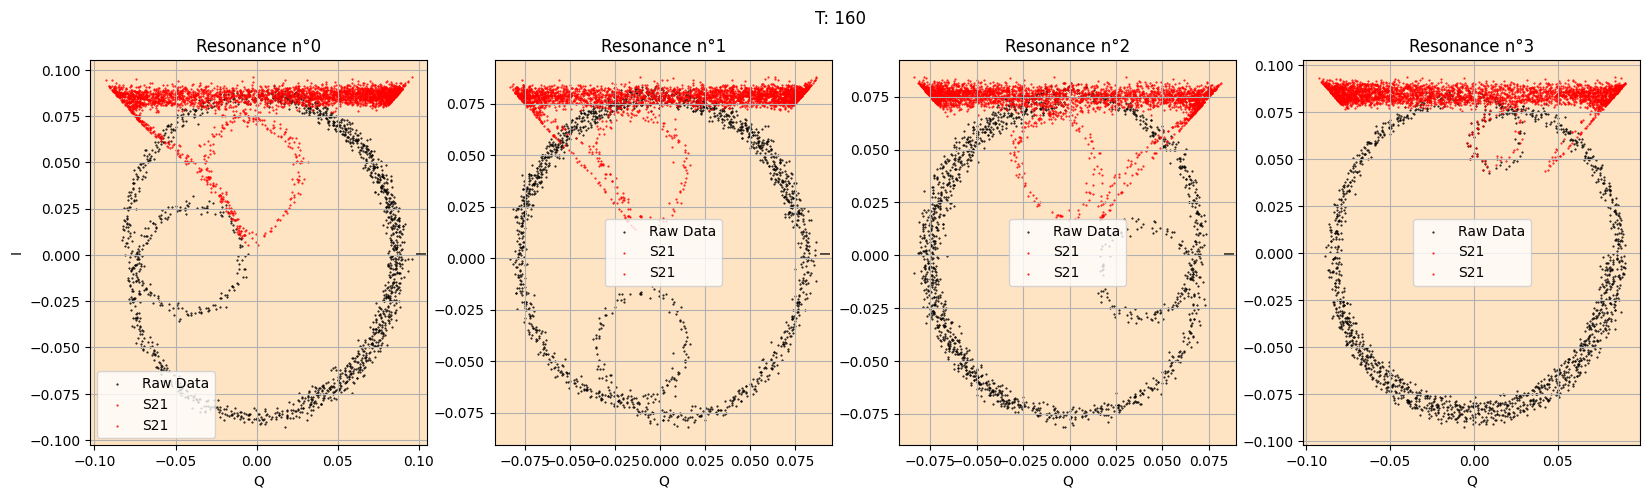

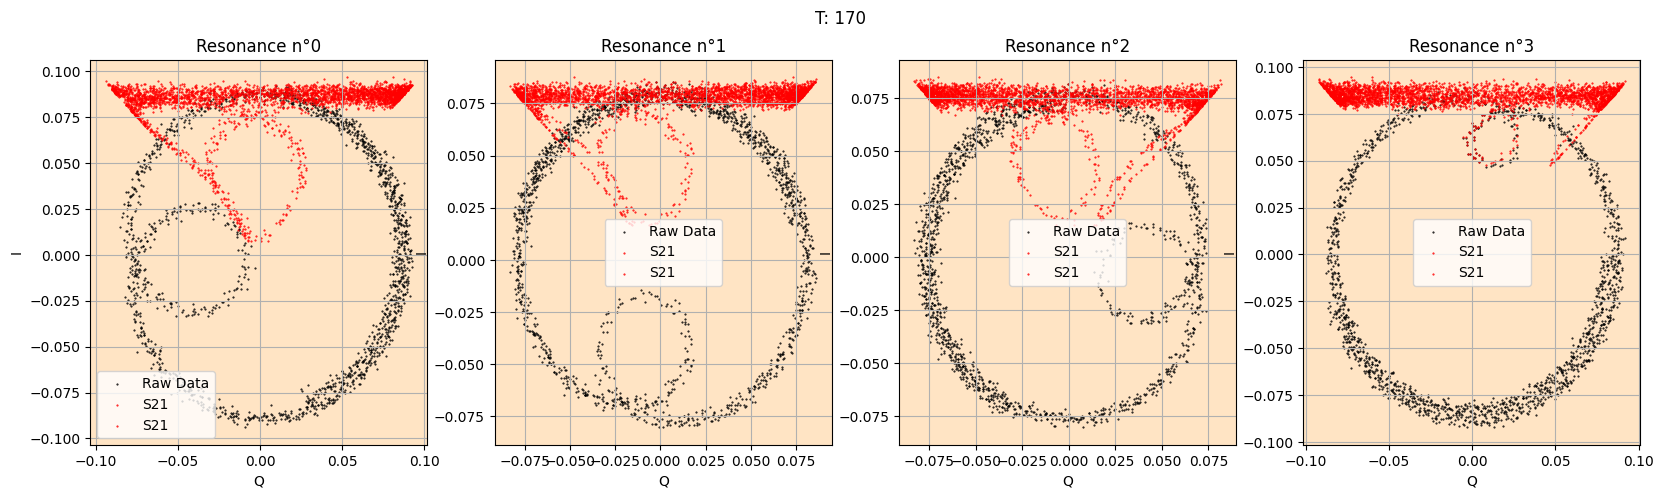

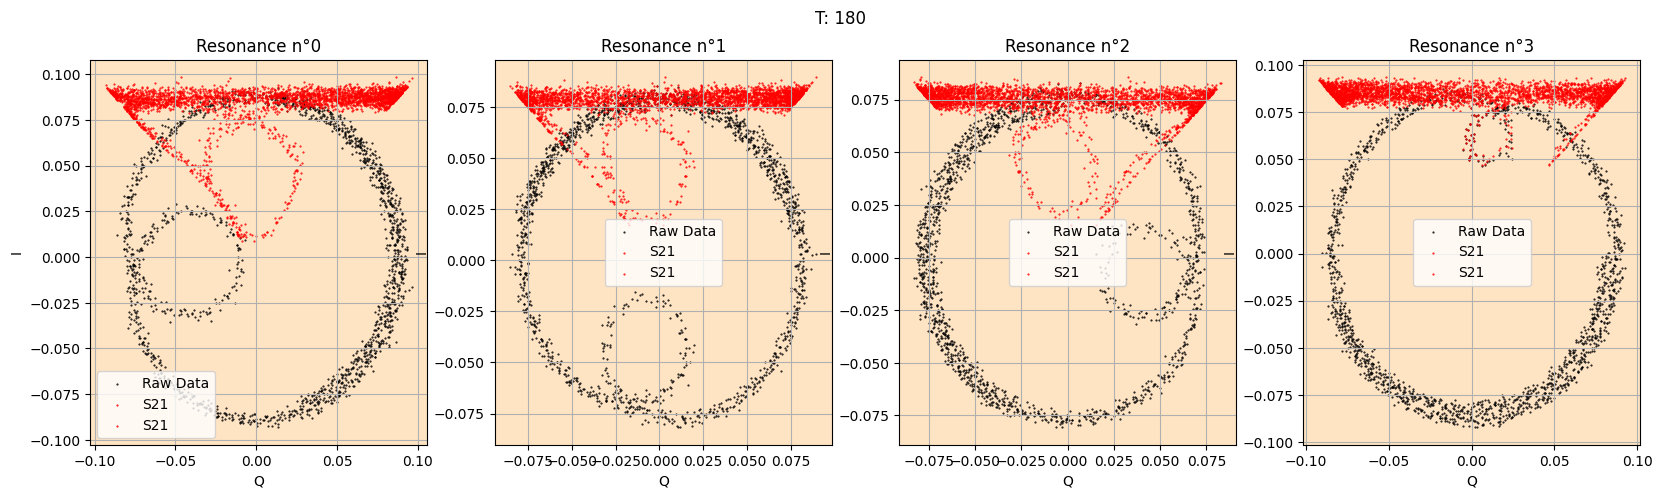

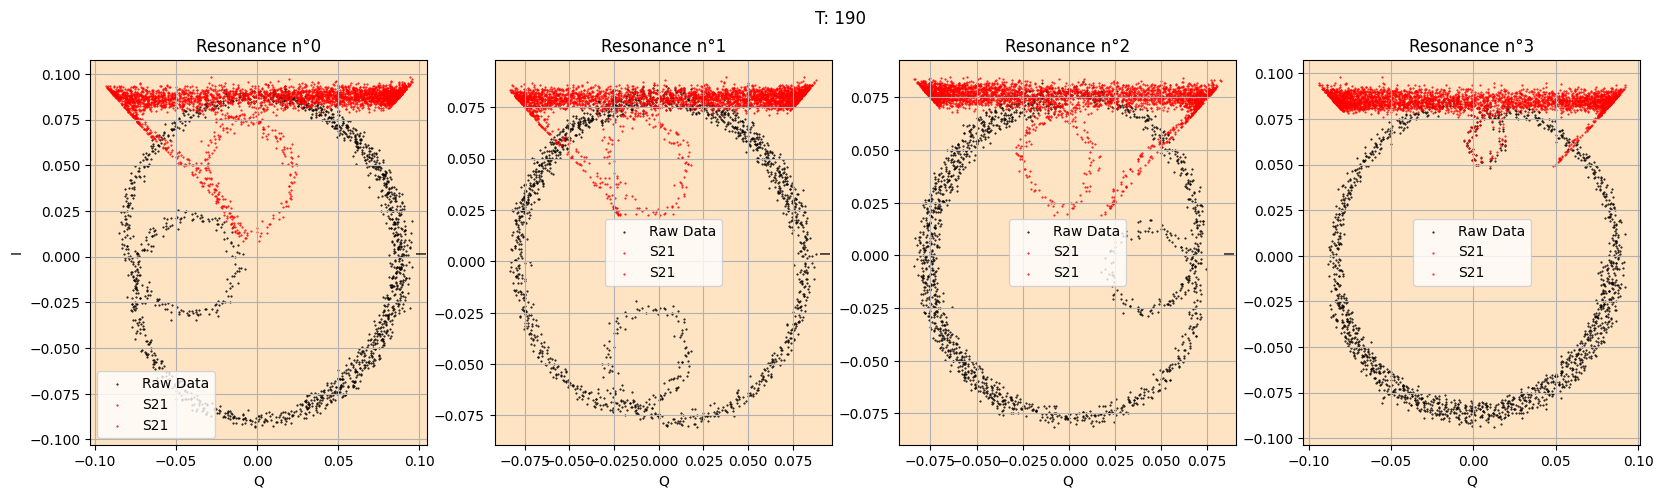

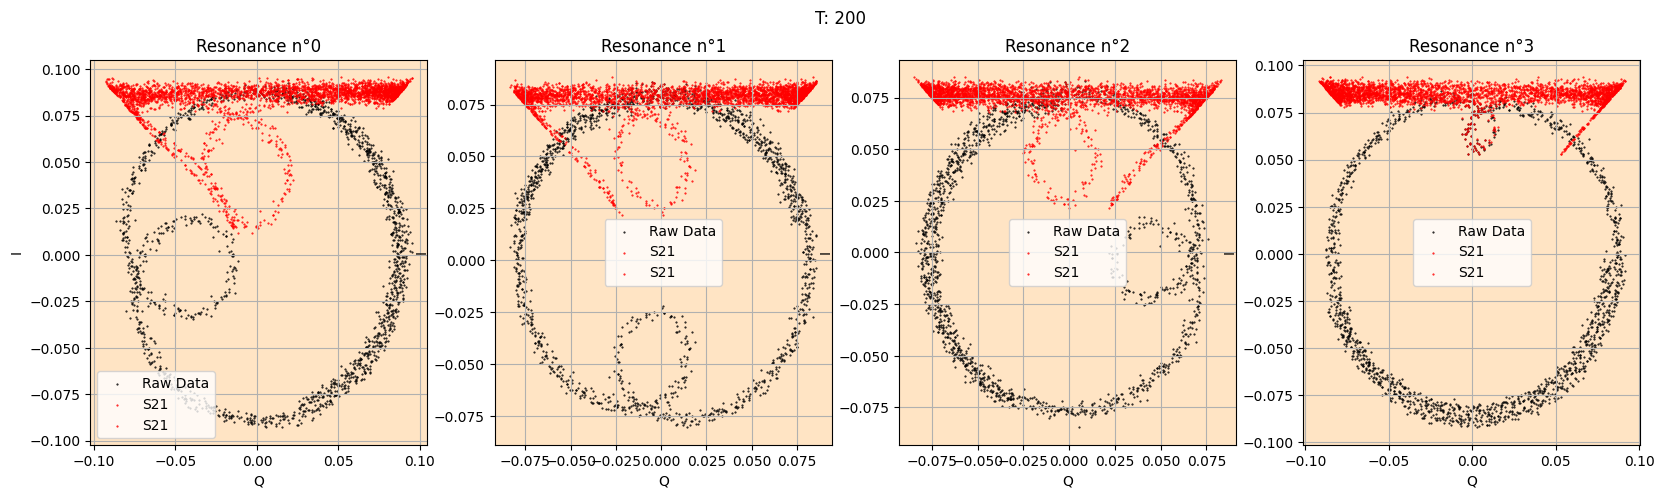

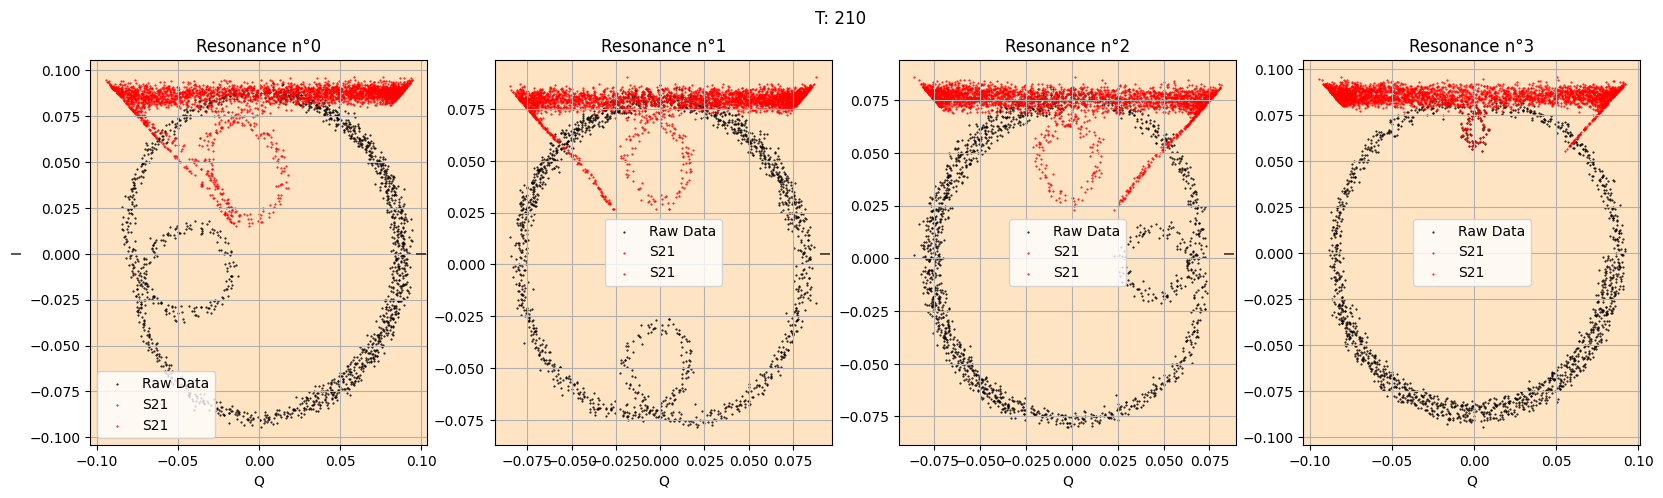

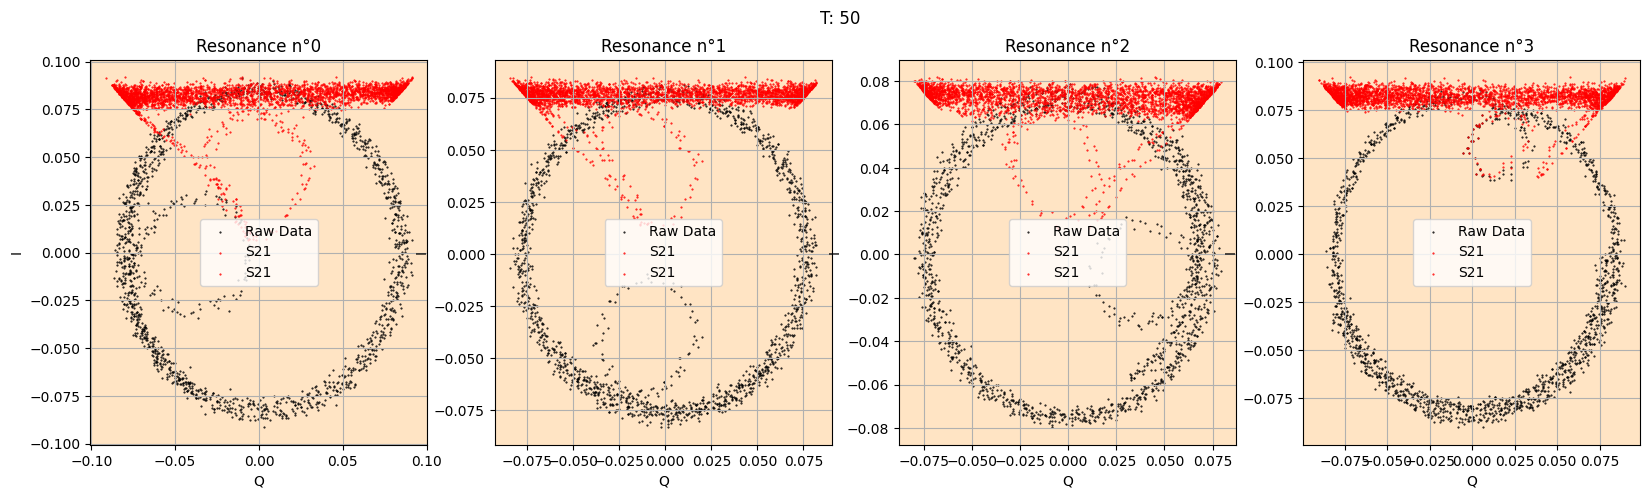

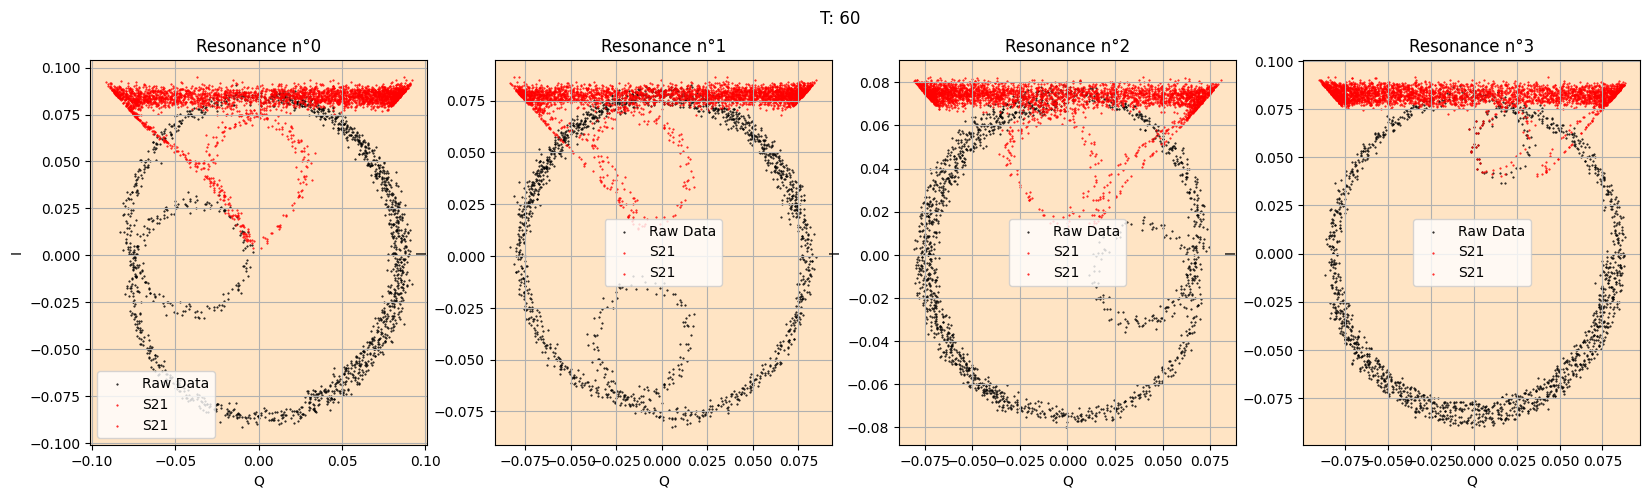

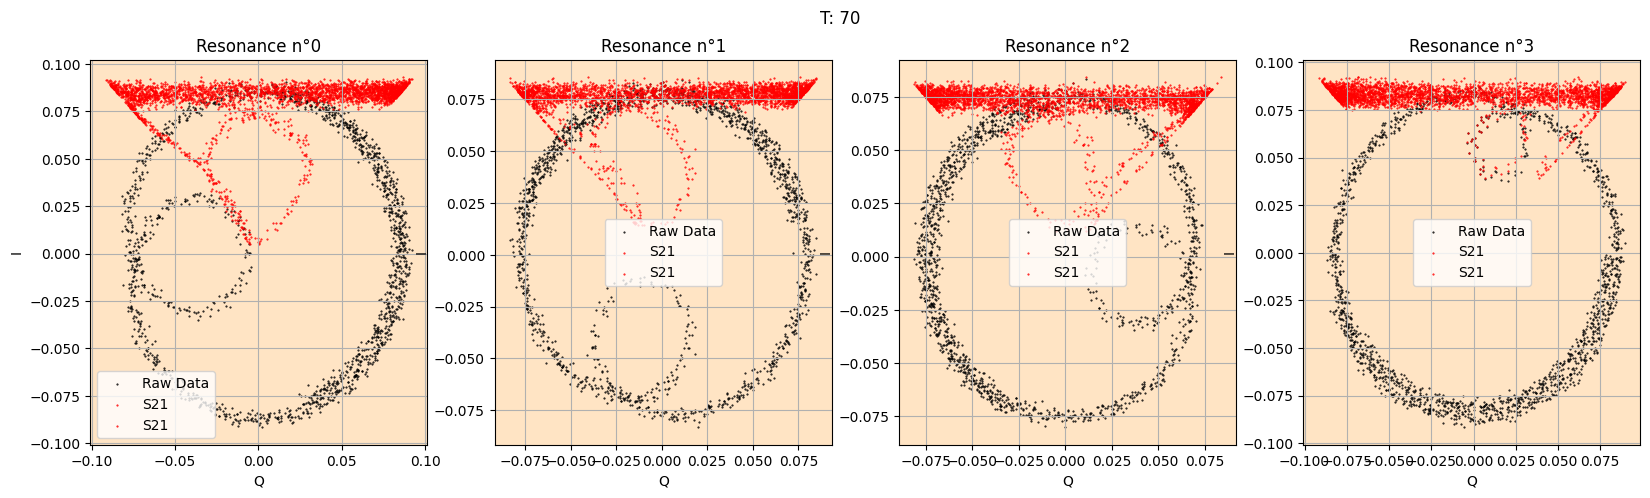

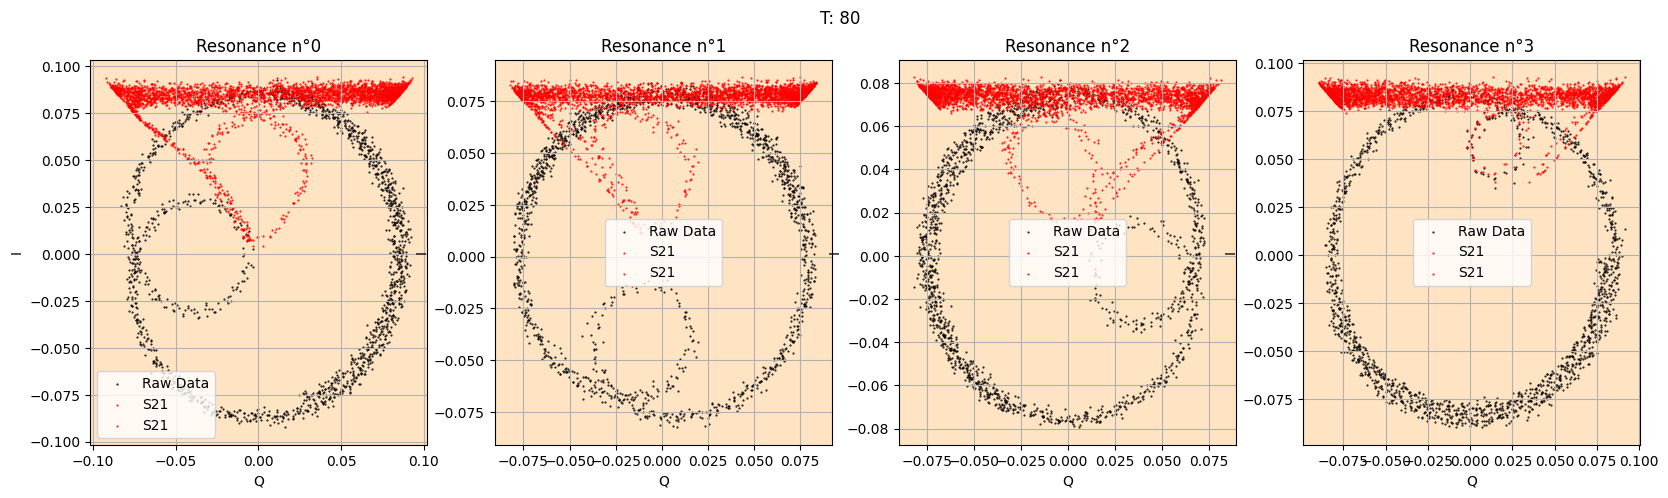

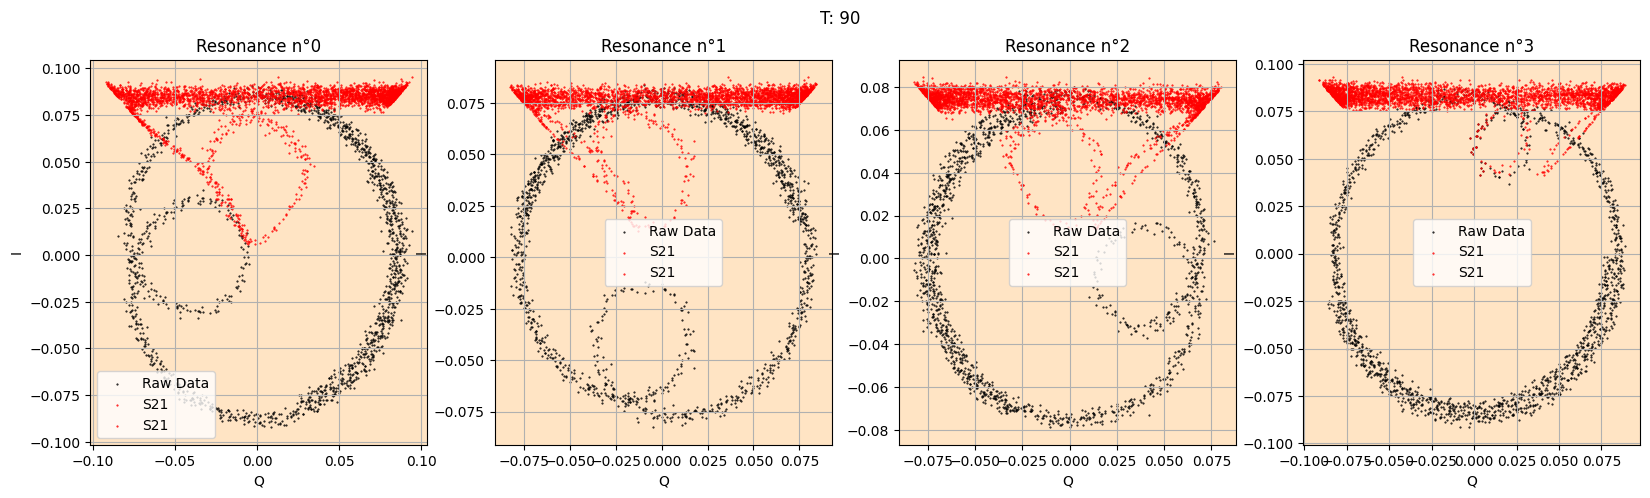

In [6]:
for i in range(len(dfs)):
    fig, axs = plt.subplots(1,4,figsize=(20,5))
    for j in range(4):
        axs[j].scatter(dfs[i][j]['i'], dfs[i][j]['q'], marker='.', s=1, label='Raw Data', color='black')
        axs[j].scatter(dfs[i][j]['i'], dfs[i][j]['S21'], marker='.', s=1, label='S21', color='red')
        axs[j].scatter(dfs[i][j]['q'], dfs[i][j]['S21'], marker='.', s=1, label='S21', color='red')
        axs[j].set_xlabel(r'Q')
        axs[j].set_ylabel(r'I')
        axs[j].set_facecolor('bisque')
        axs[j].grid()
        axs[j].legend()
        axs[j].set_title('Resonance n°'+str(j))
    fig.suptitle('T: '+str(temps[i]))

Let's rotate circles so to have them intersecting the x axis in the off resonance point

In [18]:
phi = [np.pi, 3*np.pi/2 , 0, np.pi/2]
for i in range(len(dfs)):
    for j in range(4):
        dfs[i][j]['i_rot'] = np.cos(phi[j])*dfs[i][j]['i'] + np.sin(phi[j])*dfs[i][j]['q']
        dfs[i][j]['q_rot'] = -np.sin(phi[j])*dfs[i][j]['i'] + np.cos(phi[j])*dfs[i][j]['q']

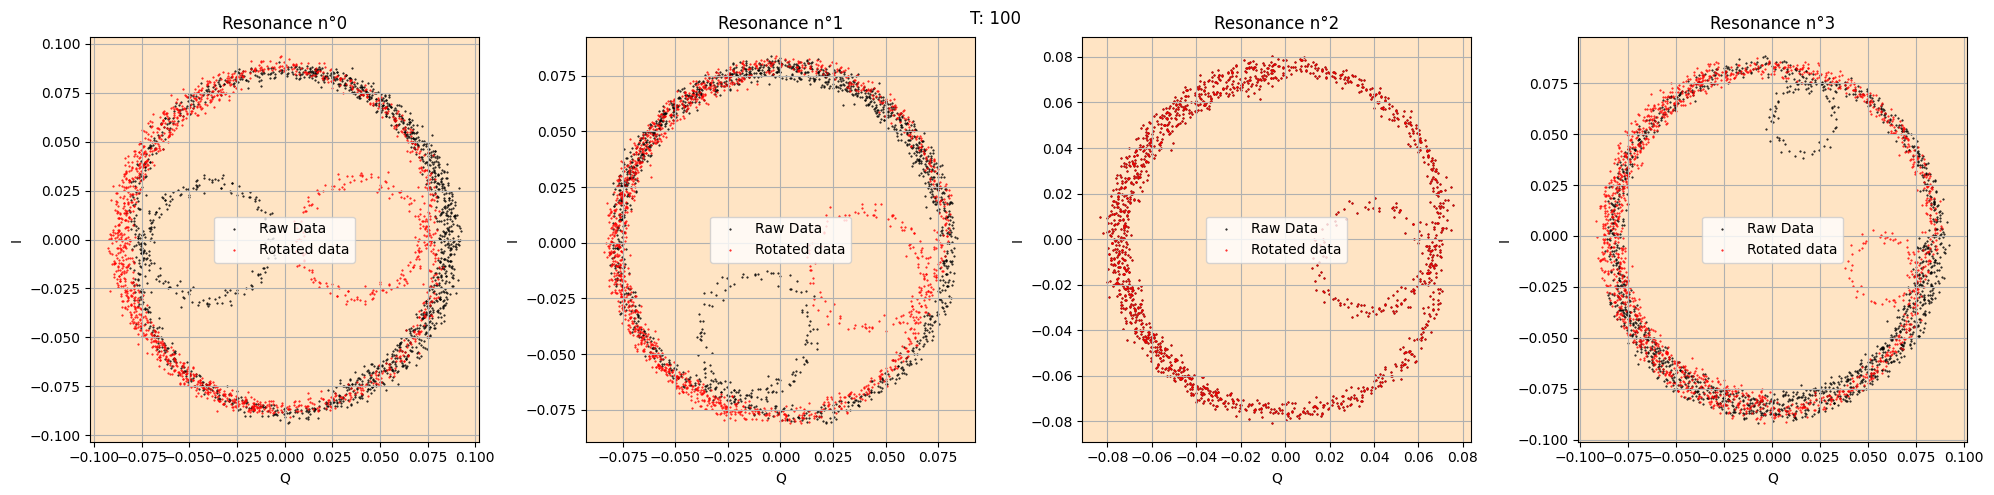

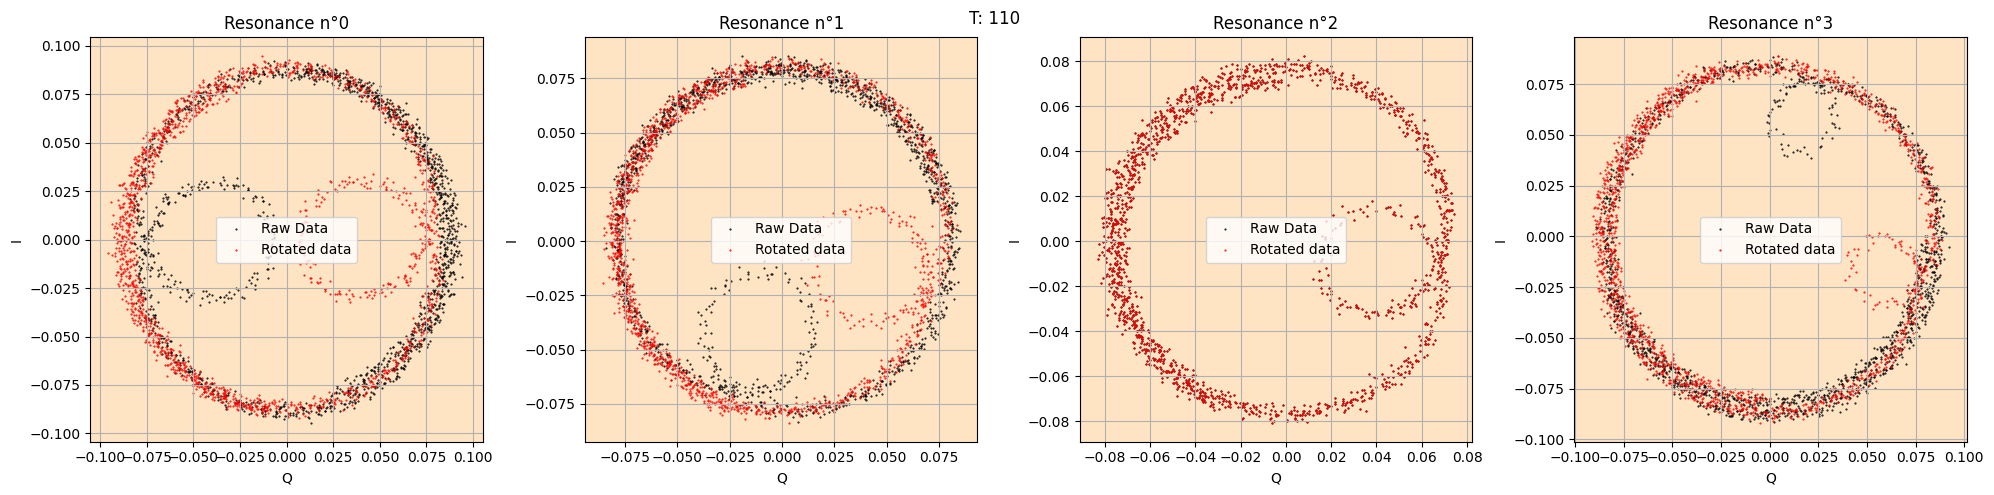

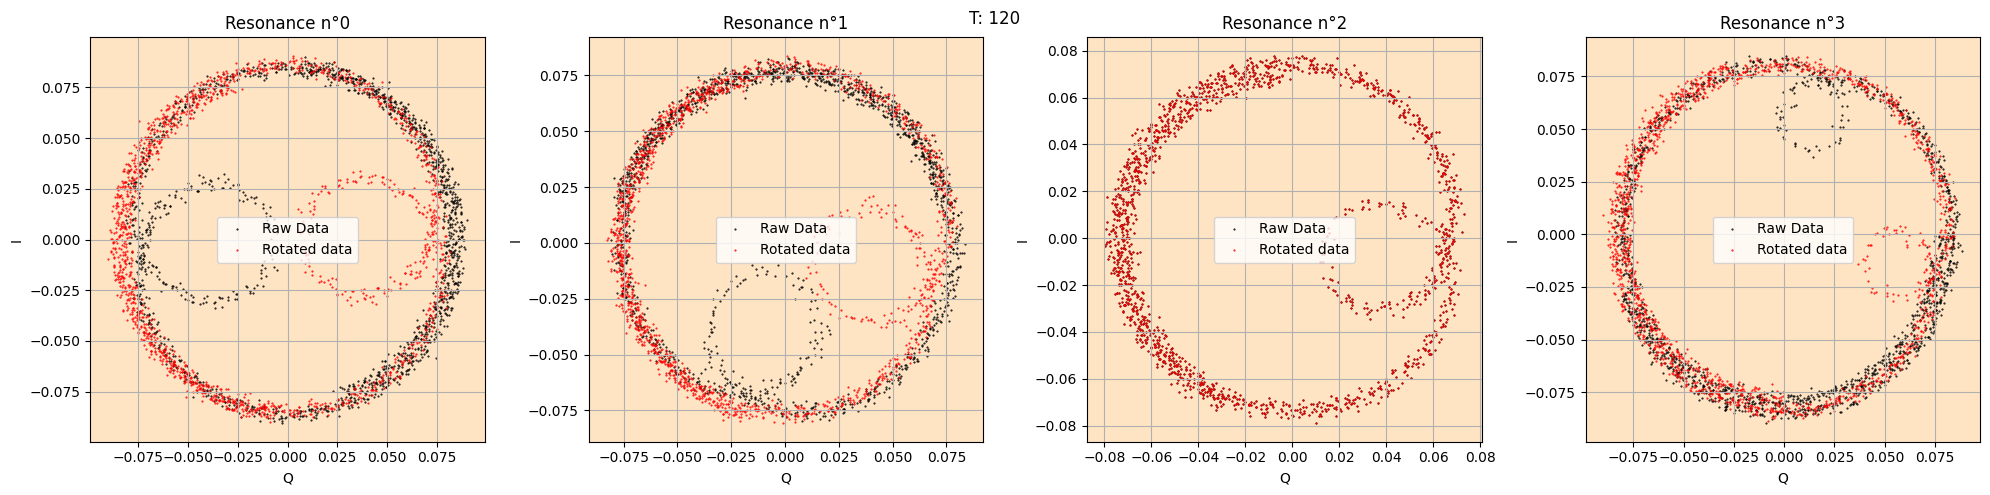

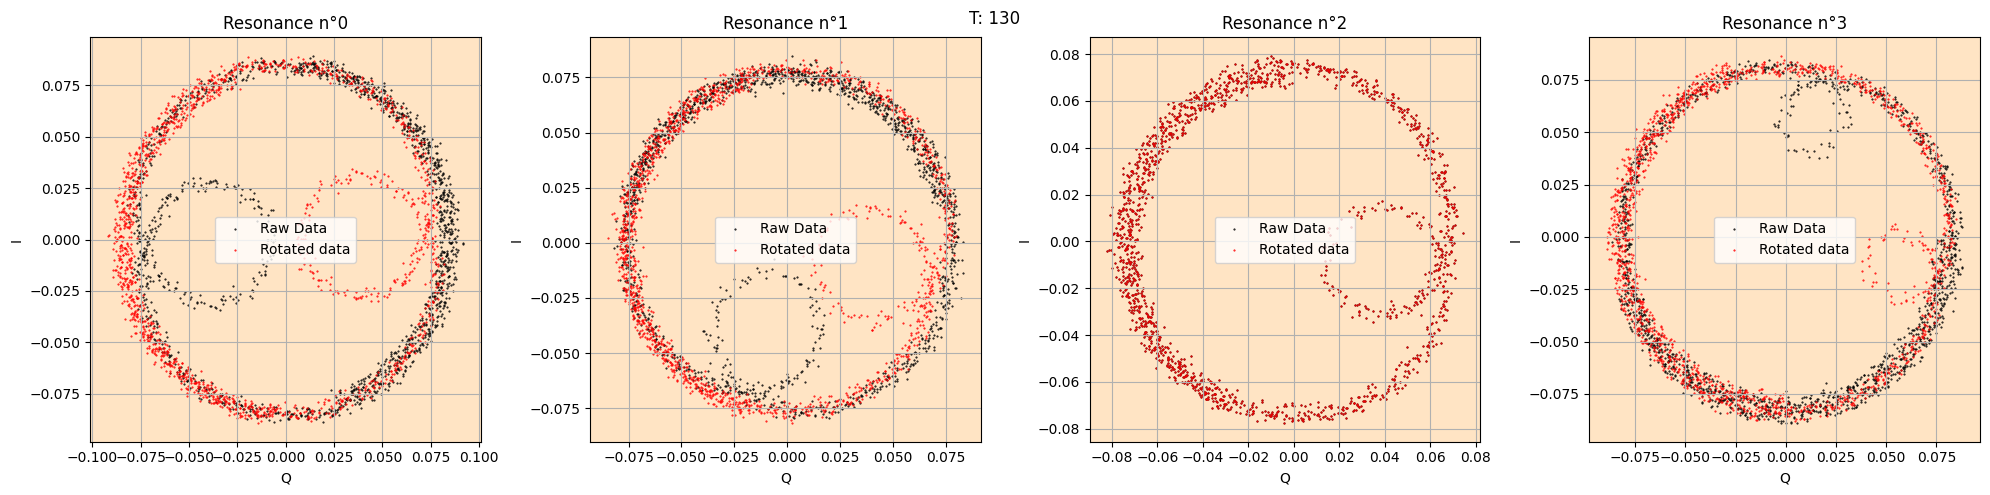

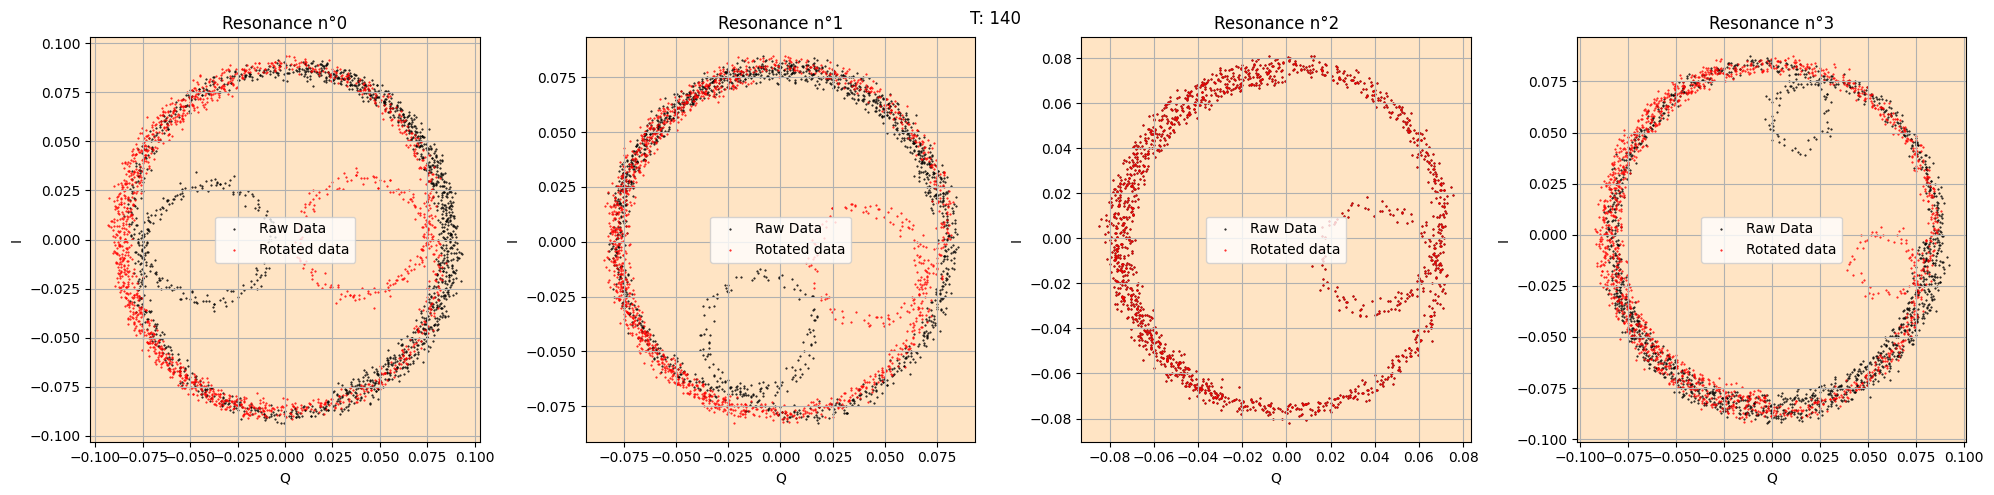

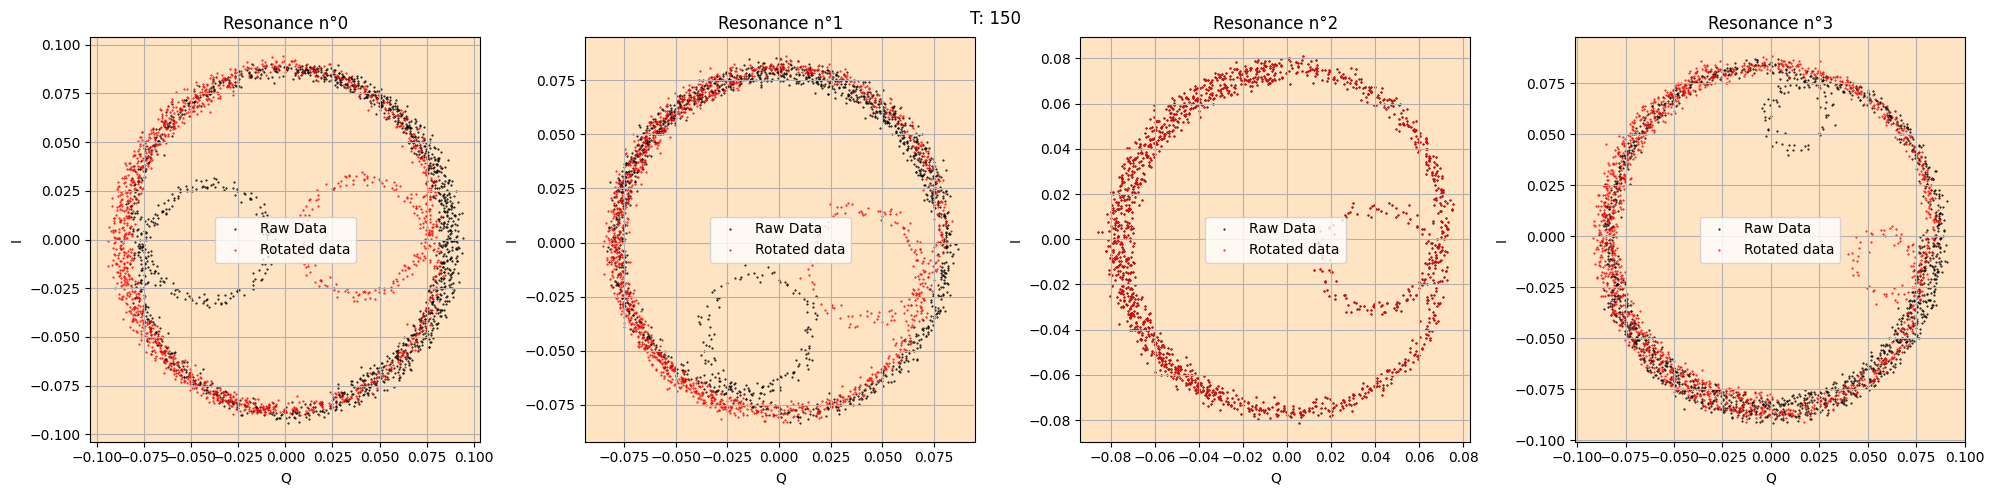

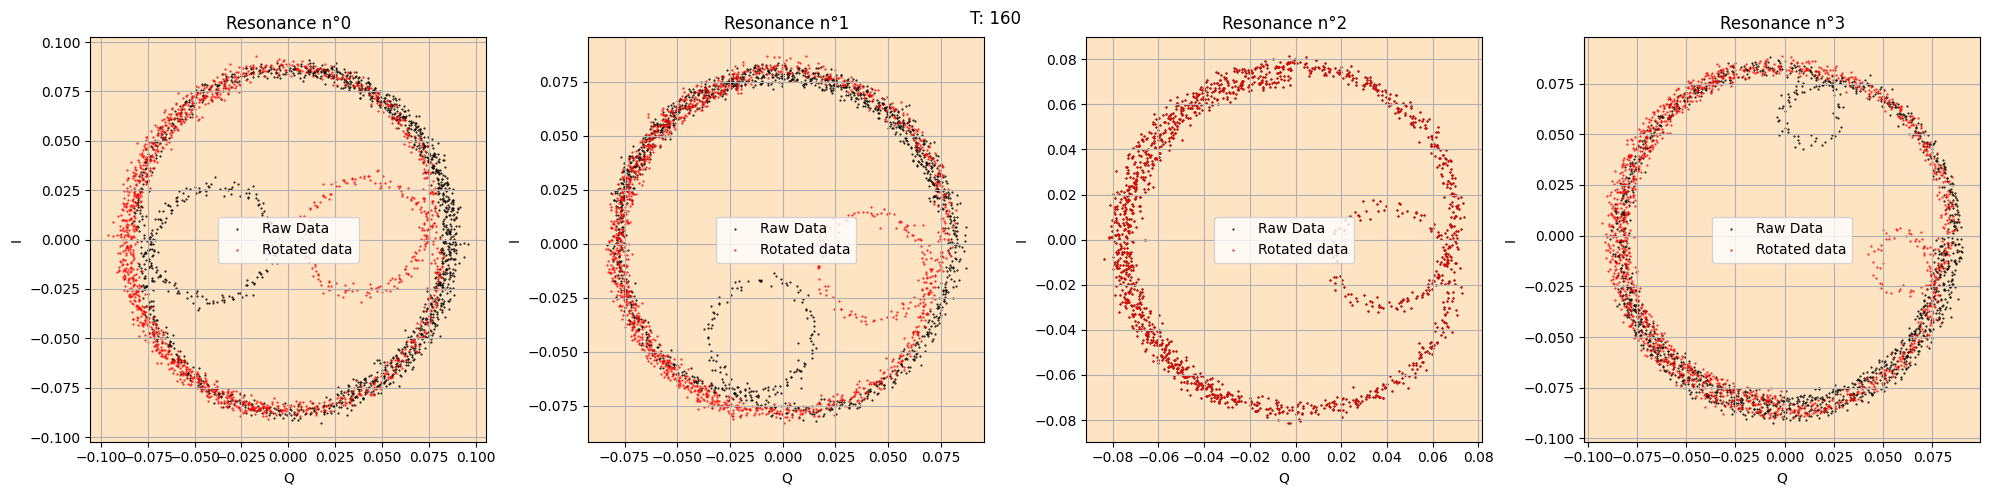

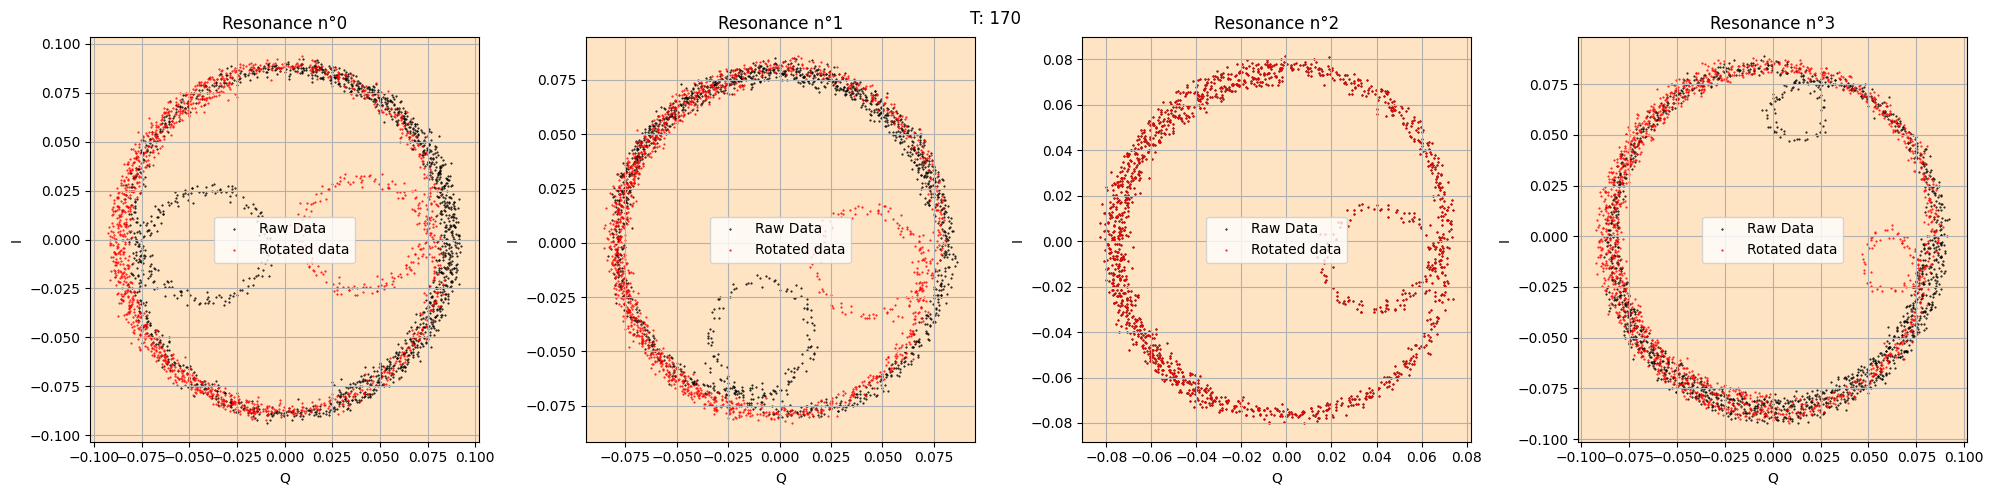

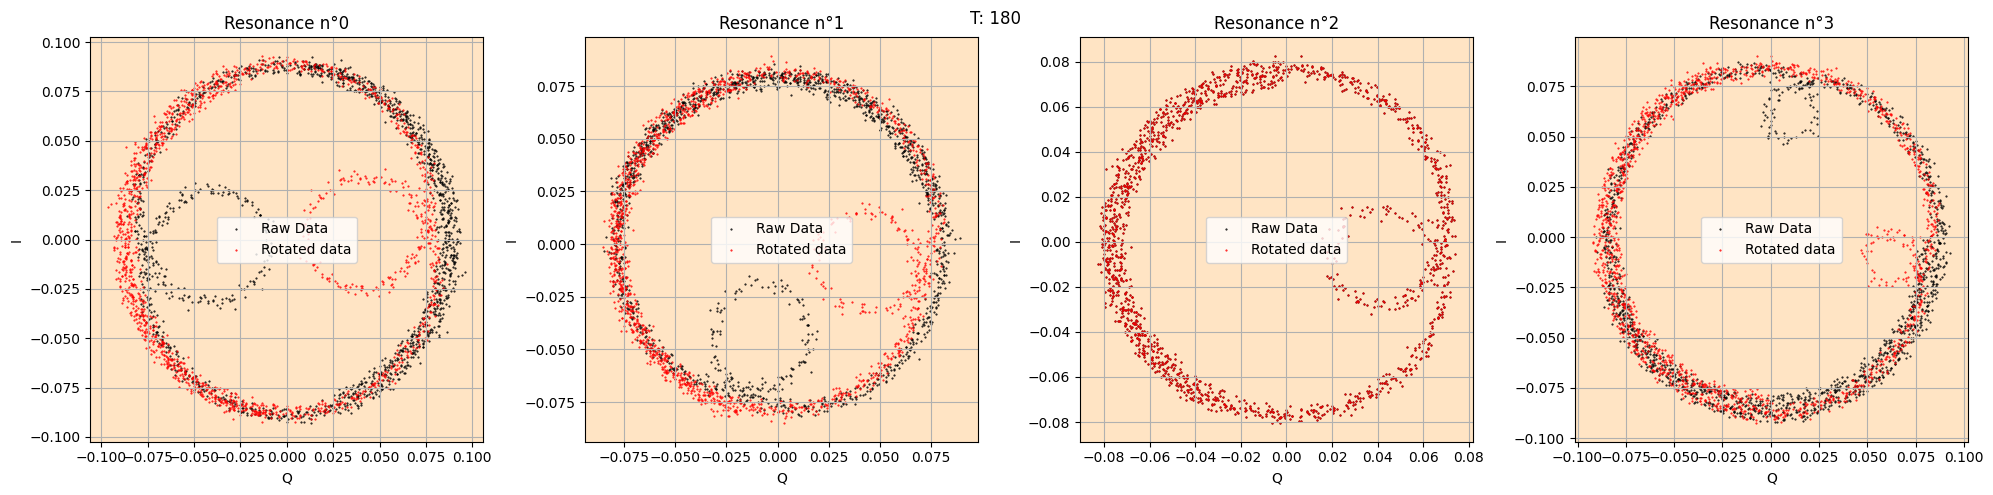

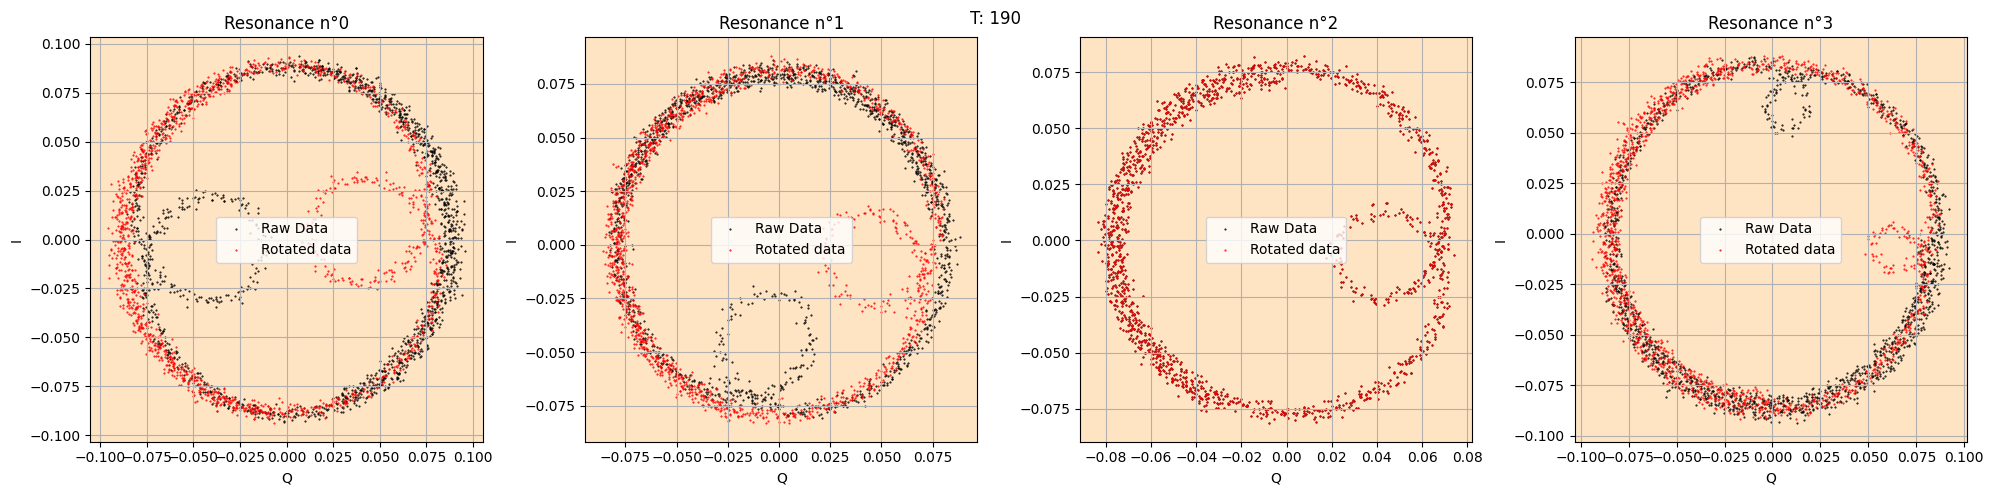

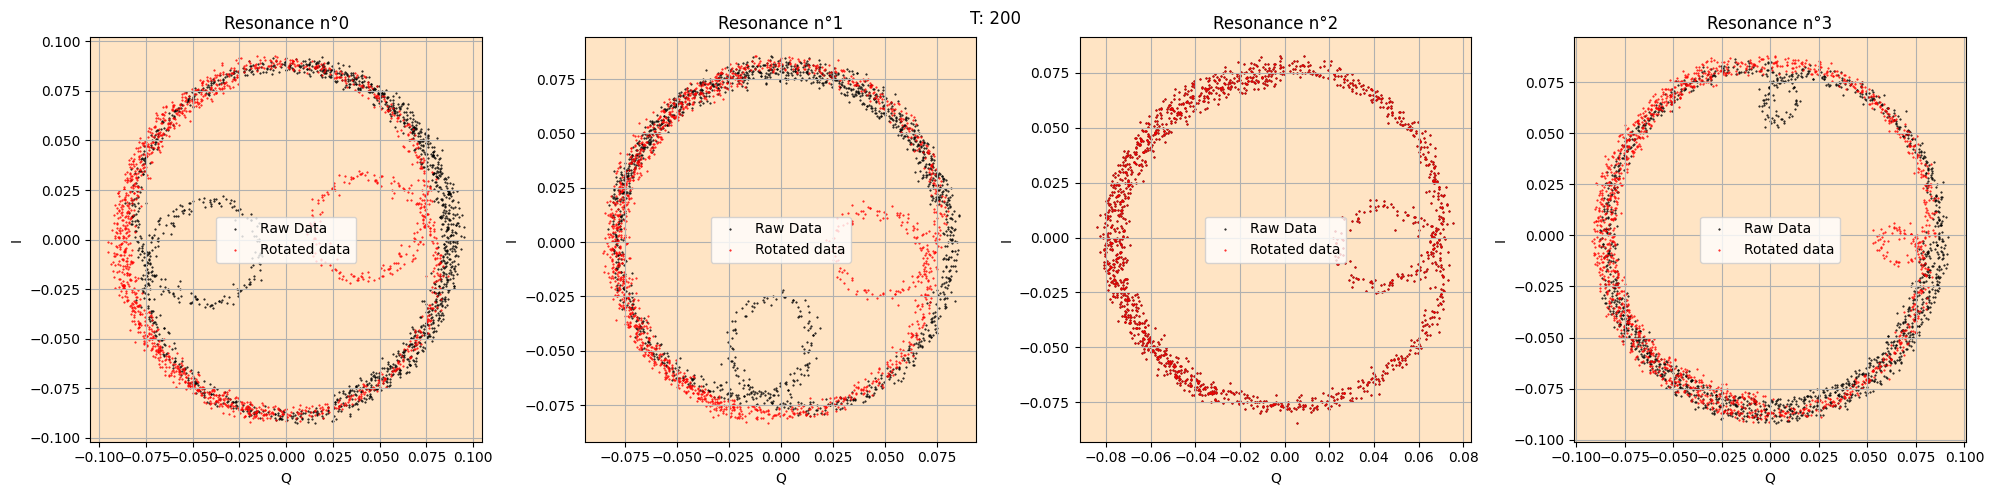

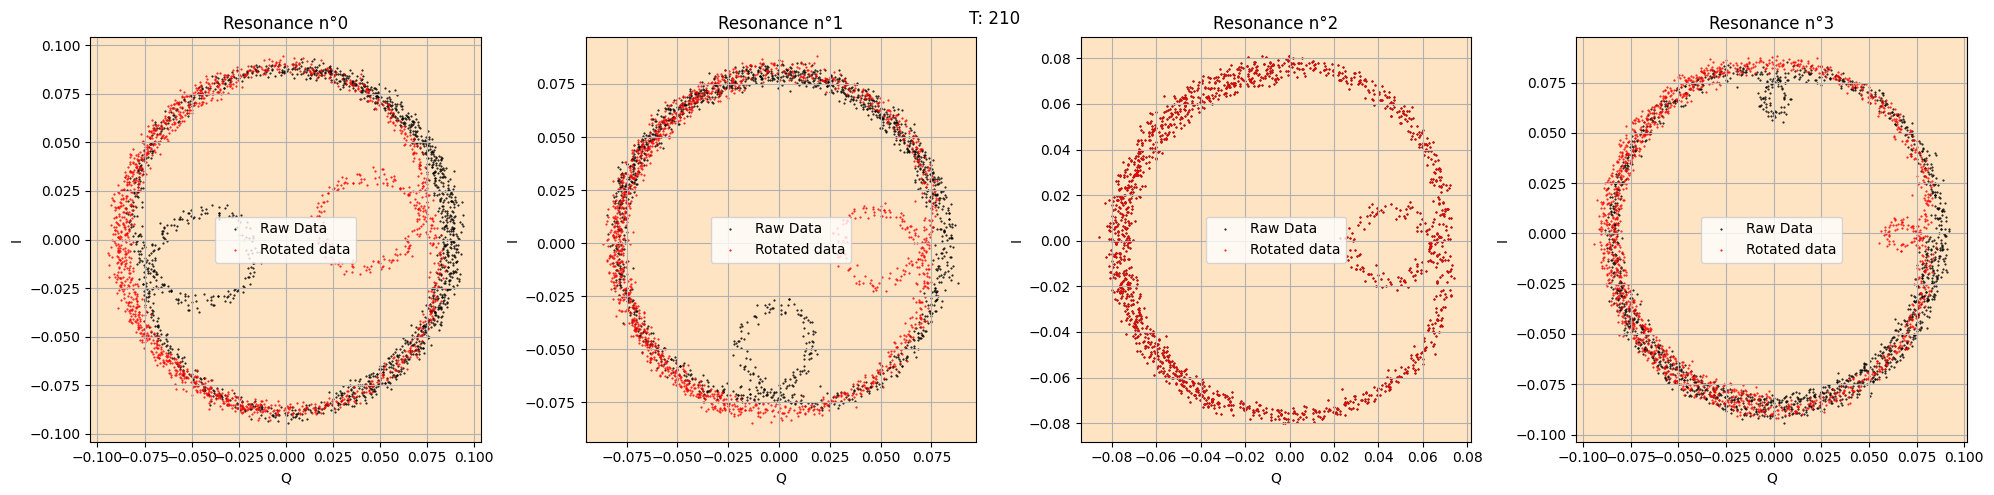

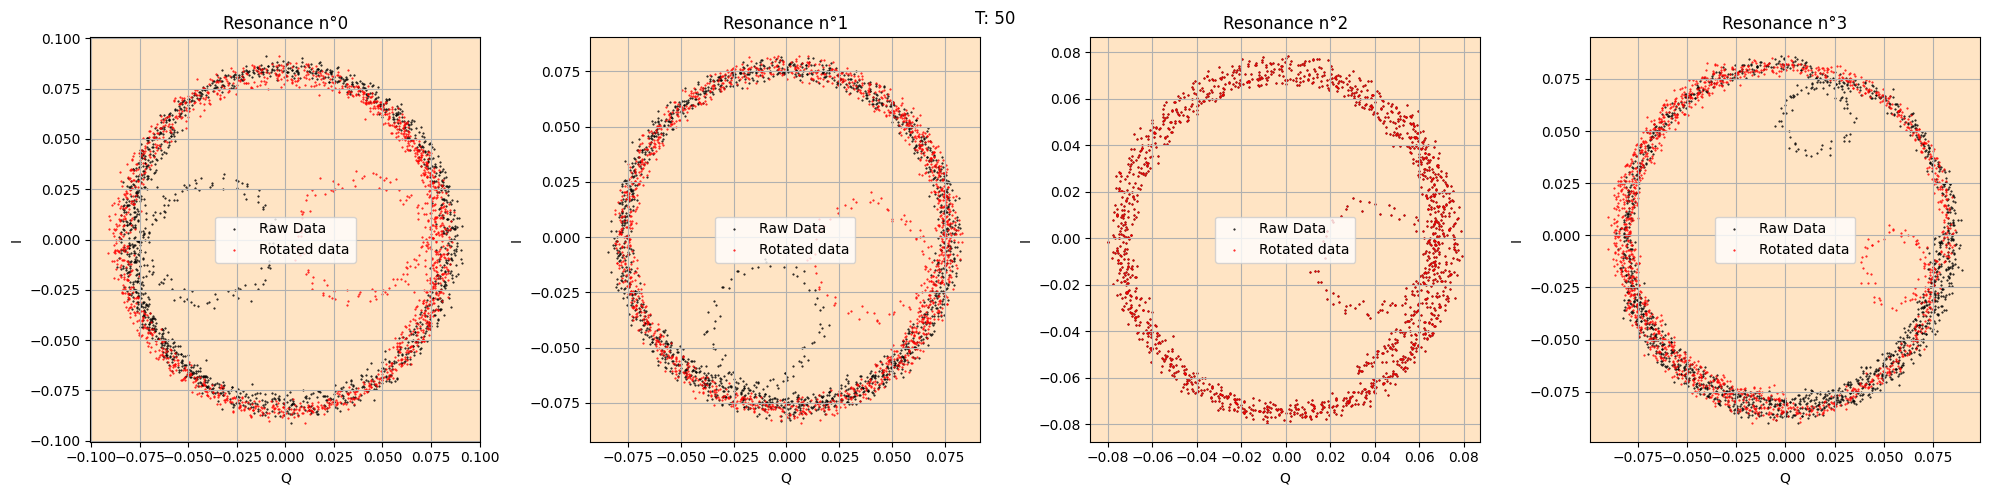

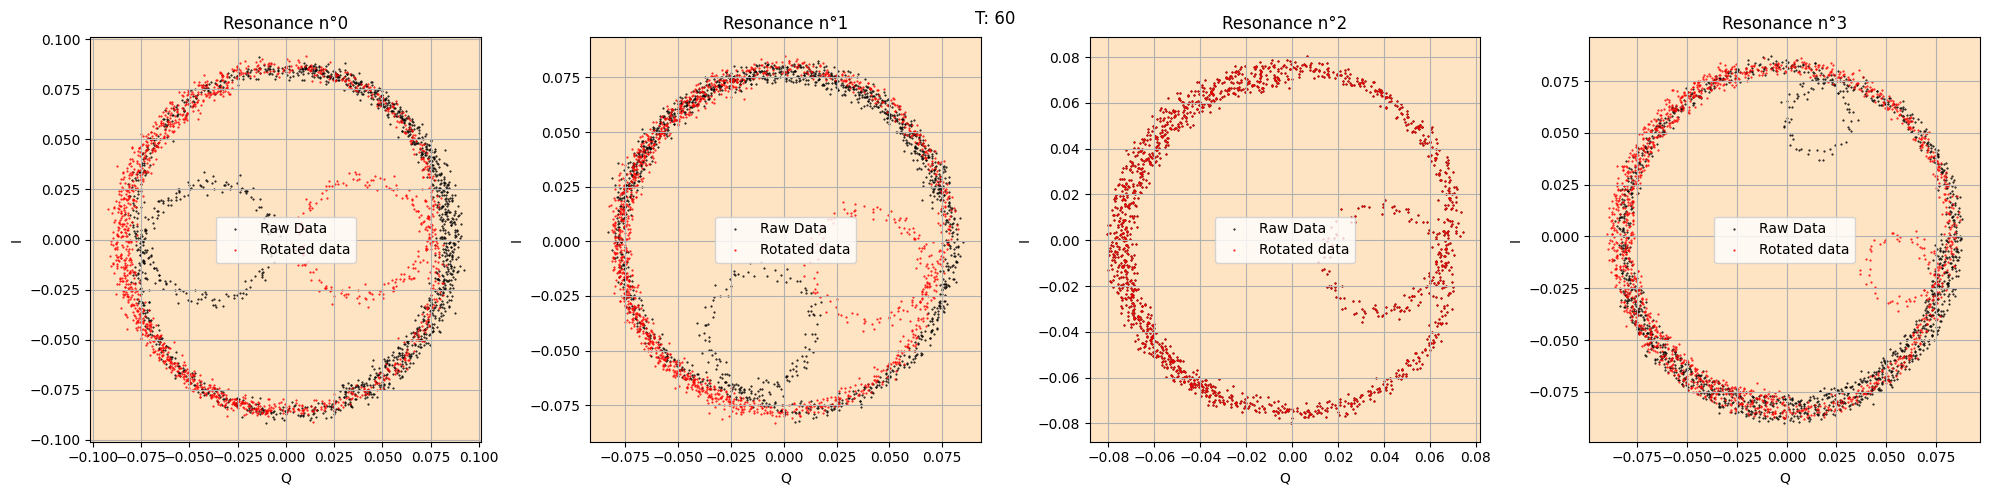

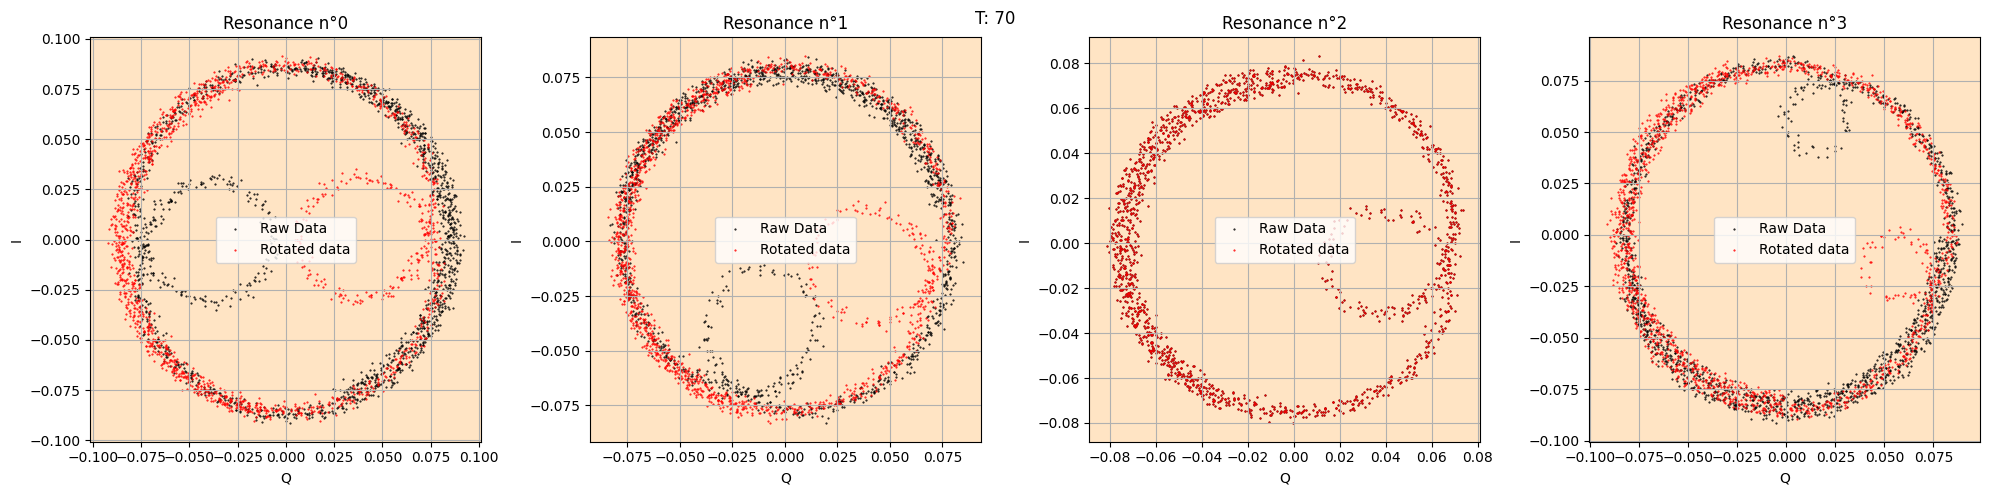

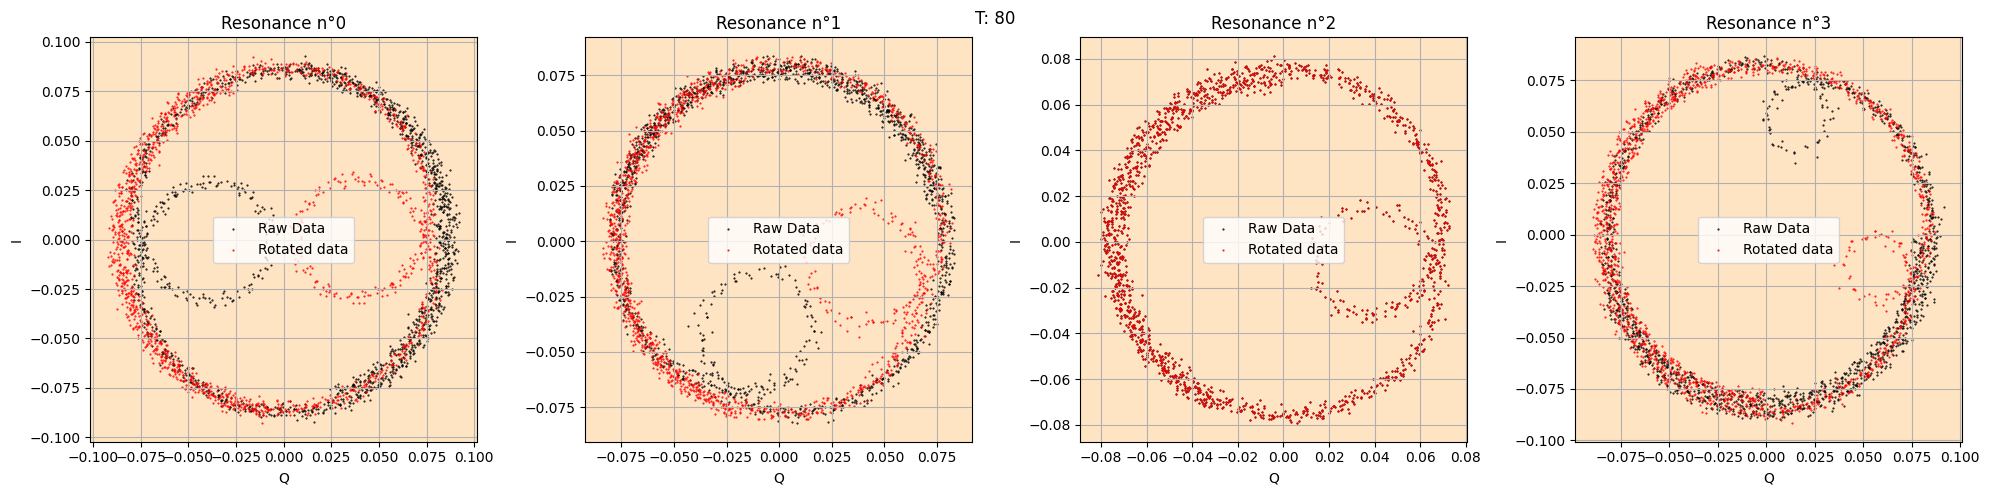

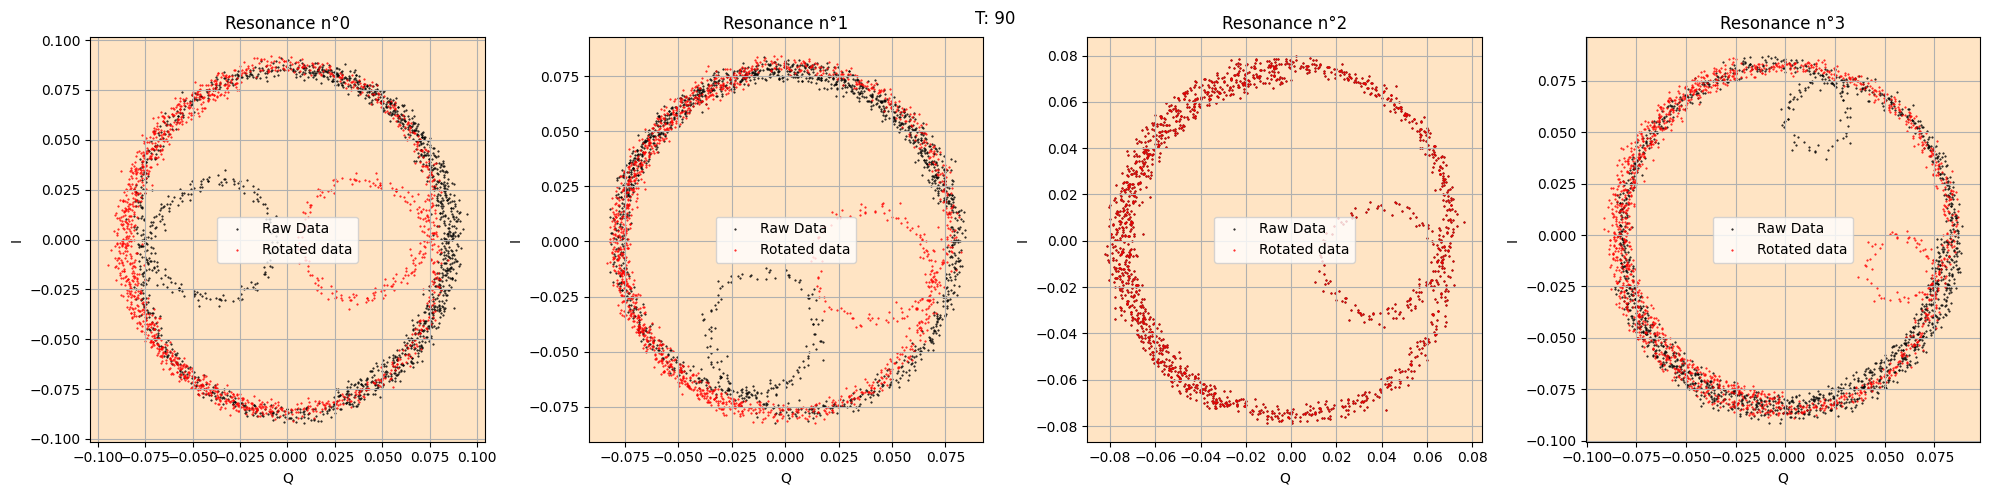

In [22]:
for i in range(len(dfs)):
    fig, axs = plt.subplots(1,4,figsize=(20,5))
    for j in range(4):
            axs[j].scatter(dfs[i][j]['i'], dfs[i][j]['q'], marker='.', s=1, label='Raw Data', color='black')
            axs[j].scatter(dfs[i][j]['i_rot'], dfs[i][j]['q_rot'], marker='.', s=1, label='Rotated data', color='red')
            axs[j].set_xlabel(r'Q')
            axs[j].set_ylabel(r'I')
            axs[j].set_facecolor('bisque')
            axs[j].grid()
            axs[j].legend()
            axs[j].set_title('Resonance n°'+str(j))
    fig.tight_layout()
    fig.suptitle('T: '+str(temps[i]))

$S_{21} \rightarrow 1-cos{\theta}e^{i\phi}(1-S_{21})$